# ColorHandPose3D Demo

This notebook demos the ColorHandPose3d network as implemented in "Learning to Estimate 3D Hand Pose from Single RGB Images" by Zimmerman et al. Their project is available at [https://github.com/lmb-freiburg/hand3d].

In [2]:
import os
import sys
import math

import torch
import torchvision
import torch.nn.functional as F
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

model_path = os.path.abspath(os.path.join('..'))
if model_path not in sys.path:
    sys.path.append(model_path)
    
from colorhandpose3d.model.ColorHandPose3D import ColorHandPose3D
from colorhandpose3d.utils.general import *
from colorhandpose3d.utils.transforms import *

## Initialize models and load weights

ColorHandPose3d consists of 4 networks:
- HandSegNet
- PoseNet
- PosePrior
- ViewPointNet

In [5]:
chp3d = ColorHandPose3D()
for param in chp3d.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


## Load and run sample

The network is trained on the RHD dataset.

In [3]:
transform0 = torchvision.transforms.ToPILImage()
transform1 = torchvision.transforms.ToTensor()
transform2 = torchvision.transforms.Resize(256)
img = Image.open('/home/ajdillhoff/Downloads/RHD_v1-1/RHD_published_v2/training/color/00007.png')
sample_original = transform1(img).unsqueeze(0)
sample = sample_original - 0.5
hand_side = torch.Tensor([[0.0, 1.0]])

# Run through network
coords_xyz_rel_normed, keypoint_scoremap, image_crop, centers, scale_crop = chp3d(sample, hand_side)
keypoint_coords3d = coords_xyz_rel_normed.detach().numpy()
keypoint_coords3d = keypoint_coords3d.squeeze()

padding x to shape torch.Size([1, 32, 33, 33])
padding x to shape torch.Size([1, 64, 17, 17])
padding x to shape torch.Size([1, 128, 9, 9])
padding x to shape torch.Size([1, 21, 34, 34])
padding x to shape torch.Size([1, 64, 33, 33])
padding x to shape torch.Size([1, 64, 18, 18])
padding x to shape torch.Size([1, 128, 17, 17])
padding x to shape torch.Size([1, 128, 10, 10])
padding x to shape torch.Size([1, 256, 9, 9])
rot_params: tensor([[-1.8129, -0.5677, -2.0467]], grad_fn=<CatBackward>)
torch.Size([1, 3, 3])


## Visualizing the output

Display the crop, heatmaps, and estimated pose.

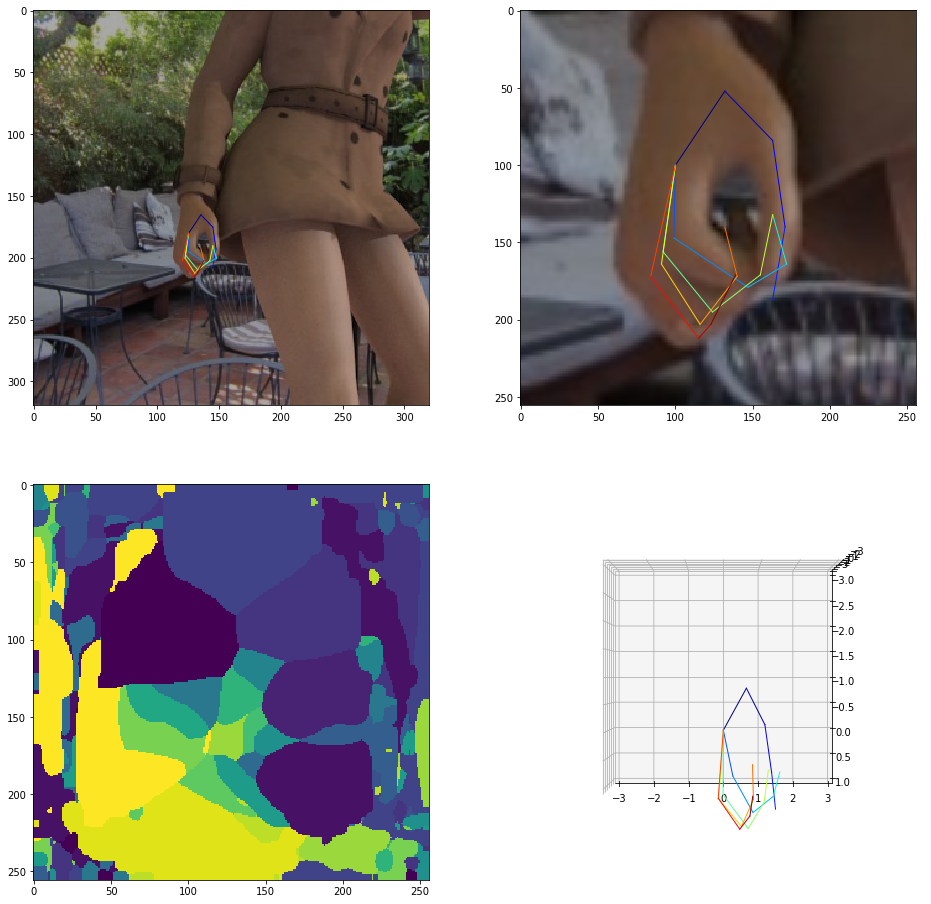

In [7]:
# Get other things to visualize
keypoint_coords_crop = detect_keypoints(keypoint_scoremap[0].detach().numpy())
keypoint_coords = transform_cropped_coords(keypoint_coords_crop, centers, scale_crop, 256)

img = transform0(sample_original.squeeze())

# visualize
fig = plt.figure(1, figsize=(16, 16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224, projection='3d')
ax1.imshow(img)
plot_hand(keypoint_coords, ax1)
ax2.imshow(transform0(image_crop[0] + 0.5))
plot_hand(keypoint_coords_crop, ax2)
ax3.imshow(np.argmax(keypoint_scoremap[0].detach().numpy(), 0))
plot_hand_3d(keypoint_coords3d, ax4)
ax4.view_init(azim=-90.0, elev=-90.0)  # aligns the 3d coord with the camera view
ax4.set_xlim([-3, 3])
ax4.set_ylim([-3, 1])
ax4.set_zlim([-3, 3])
plt.show()